<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Mnist/blob/main/MNIST_121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8187 - loss: 0.5985 - val_accuracy: 0.9529 - val_loss: 0.1624
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9337 - loss: 0.2244 - val_accuracy: 0.9625 - val_loss: 0.1217
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9466 - loss: 0.1839 - val_accuracy: 0.9665 - val_loss: 0.1068
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9521 - loss: 0.1573 - val_accuracy: 0.9707 - val_loss: 0.0940
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9531 - loss: 0.1522 - val_accuracy: 0.9746 - val_loss: 0.0862
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9584 - loss: 0.1368 - val_accuracy: 0.9746 - val_loss: 0.0879
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9606 - loss: 0.1260 - val_accuracy: 0.9744 - val_loss: 0.0845
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1244 - val

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1017


[0.08613646775484085, 0.9750999808311462]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


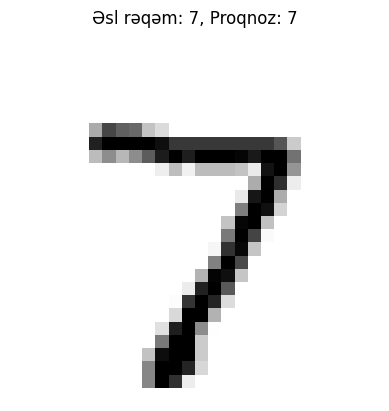

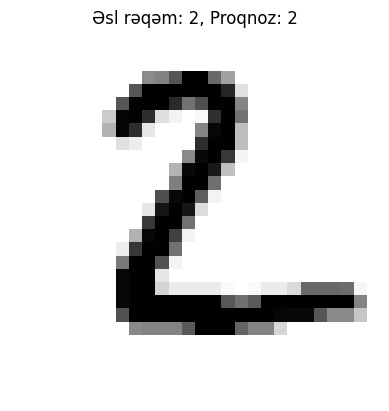

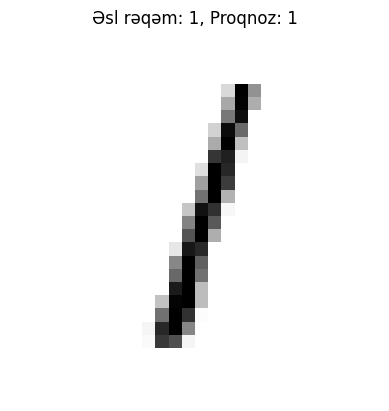

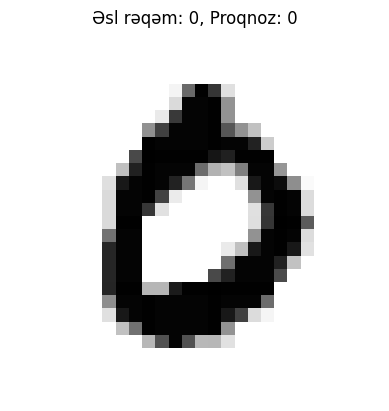

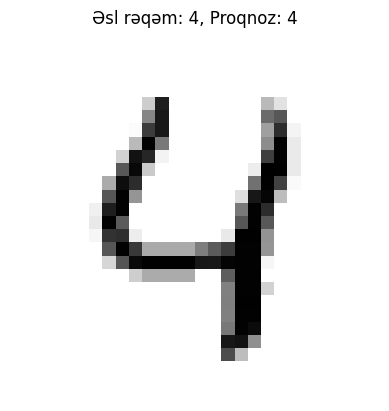

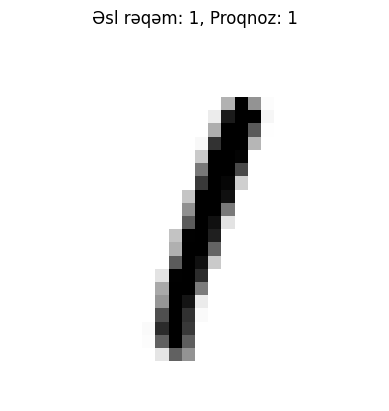

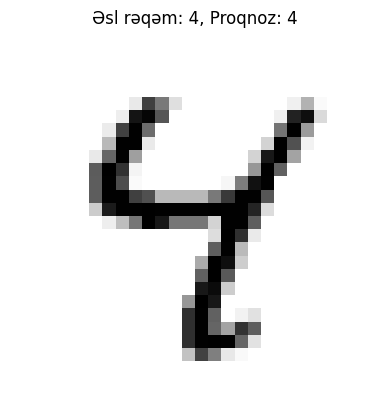

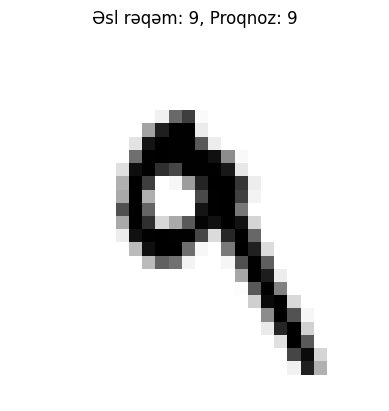

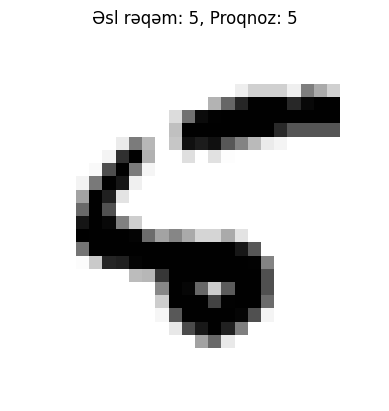

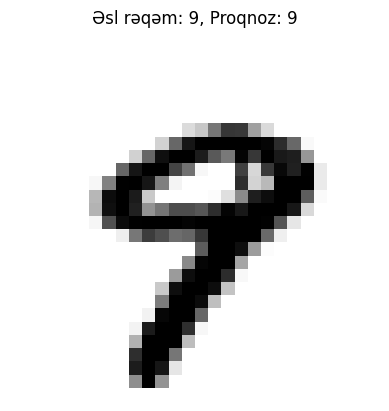

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)
for i in range(10):
    plt.imshow(X_test[i], cmap='binary')
    plt.title(f"Əsl rəqəm: {y_test[i]}, Proqnoz: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


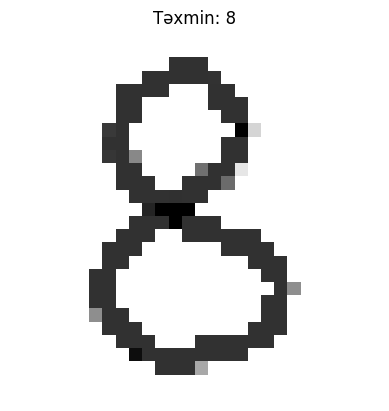

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Şəkli yüklə və əvvəlcədən 28x28-ə ölçüsünü dəyiş
img = cv2.imread("/content/8.PNG", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

# MNIST-in rəqəmləri ağ fonda qara rəqəmdir — səninki tərsdirsə, invert elə
img = 255 - img

# 0-1 aralığına gətir
img = img / 255.0

# Modelin gözlədiyi formata sal: (1, 28, 28)
img = img.reshape(1, 28, 28)

# Təxmin et
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Nəticəni göstər
plt.imshow(img.reshape(28, 28), cmap='binary')
plt.title(f"Təxmin: {predicted_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


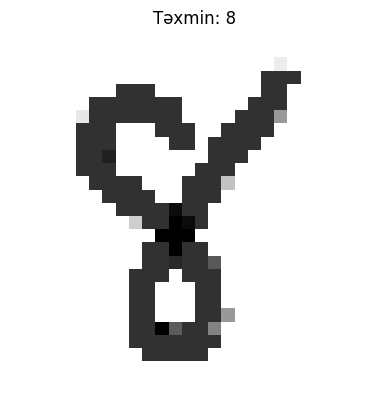

In [ ]:
img = cv2.imread("/content/eyri_8.PNG", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

# MNIST-in rəqəmləri ağ fonda qara rəqəmdir — səninki tərsdirsə, invert elə
img = 255 - img

# 0-1 aralığına gətir
img = img / 255.0

# Modelin gözlədiyi formata sal: (1, 28, 28)
img = img.reshape(1, 28, 28)

# Təxmin et
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Nəticəni göstər
plt.imshow(img.reshape(28, 28), cmap='binary')
plt.title(f"Təxmin: {predicted_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


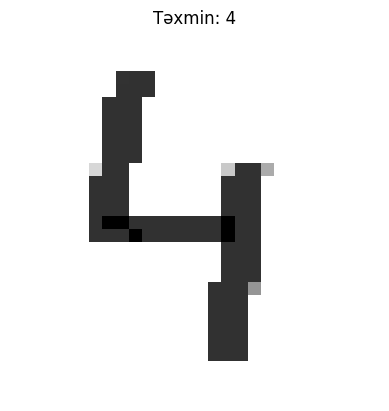

In [ ]:
img = cv2.imread("/content/normal_4.PNG", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

# MNIST-in rəqəmləri ağ fonda qara rəqəmdir — səninki tərsdirsə, invert elə
img = 255 - img

# 0-1 aralığına gətir
img = img / 255.0

# Modelin gözlədiyi formata sal: (1, 28, 28)
img = img.reshape(1, 28, 28)

# Təxmin et
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Nəticəni göstər
plt.imshow(img.reshape(28, 28), cmap='binary')
plt.title(f"Təxmin: {predicted_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


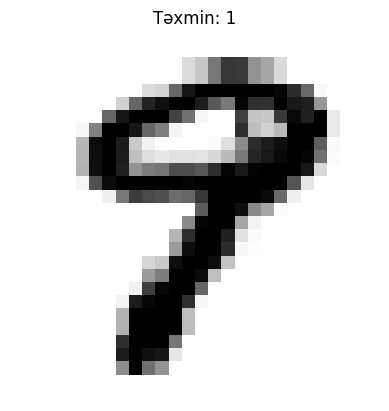

In [ ]:
img = cv2.imread("/content/DOQQUZ.PNG", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

# MNIST-in rəqəmləri ağ fonda qara rəqəmdir — səninki tərsdirsə, invert elə
img = 255 - img

# 0-1 aralığına gətir
img = img / 255.0

# Modelin gözlədiyi formata sal: (1, 28, 28)
img = img.reshape(1, 28, 28)

# Təxmin et
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Nəticəni göstər
plt.imshow(img.reshape(28, 28), cmap='binary')
plt.title(f"Təxmin: {predicted_digit}")
plt.axis("off")
plt.show()